In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/Housing.csv'
df = pd.read_csv(file_path)

# Display basic information and first few rows
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


(None,
       price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
 0  13300000  7420         4          2        3      yes        no       no   
 1  12250000  8960         4          4        4      yes        no       no   
 2  12250000  9960         3          2        2      yes        no      yes   
 3  12215000  7500         4          2        2      yes        no      yes   
 4  11410000  7420         4          1        2      yes       yes      yes   
 
   hotwaterheating airconditioning  parking prefarea furnishingstatus  
 0              no             yes        2      yes        furnished  
 1              no             yes        3       no        furnished  
 2              no              no        2      yes   semi-furnished  
 3              no             yes        3      yes        furnished  
 4              no             yes        2       no        furnished  )

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Separate features and target
X = df.drop("price", axis=1)
y = df["price"]

In [4]:

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include="object").columns.tolist()
numerical_cols = X.select_dtypes(exclude="object").columns.tolist()

In [5]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ]
)

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Pipelines for Linear Regression and Gradient Boosting
linreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [8]:
gbr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

In [9]:
# Train both models
linreg_pipeline.fit(X_train, y_train)
gbr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', 'passthrough',
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories',
                                                   'parking']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning',
                                                   'prefarea',
                                                   'furnishingstatus'])])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

In [10]:
# Predictions
linreg_preds = linreg_pipeline.predict(X_test)
gbr_preds = gbr_pipeline.predict(X_test)

In [12]:
# Evaluation
linreg_mae = mean_absolute_error(y_test, linreg_preds)
linreg_rmse = np.sqrt(mean_squared_error(y_test, linreg_preds))
gbr_mae = mean_absolute_error(y_test, gbr_preds)
gbr_rmse = np.sqrt(mean_squared_error(y_test, gbr_preds))

(linreg_mae, linreg_rmse), (gbr_mae, gbr_rmse)

((970043.4039201636, np.float64(1324506.9600914386)),
 (959748.9636349058, np.float64(1299385.9799064747)))

In [13]:
print("Linear Regression MAE: ", linreg_mae)
print("Linear Regression RMSE: ", linreg_rmse)
print("Gradient Boosting MAE: ", gbr_mae)
print("Gradient Boosting RMSE: ", gbr_rmse)

Linear Regression MAE:  970043.4039201636
Linear Regression RMSE:  1324506.9600914386
Gradient Boosting MAE:  959748.9636349058
Gradient Boosting RMSE:  1299385.9799064747


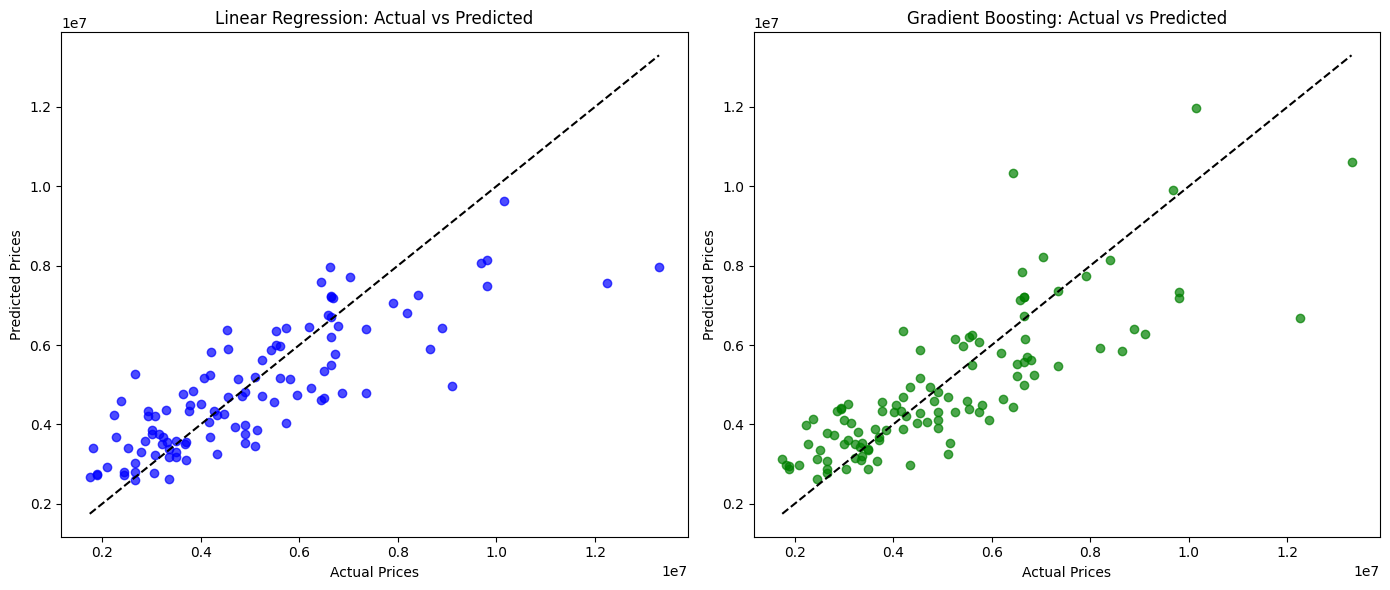

In [14]:
# Plot predicted vs actual prices for both models
plt.figure(figsize=(14, 6))

# Linear Regression Plot
plt.subplot(1, 2, 1)
plt.scatter(y_test, linreg_preds, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='black')
plt.title('Linear Regression: Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

# Gradient Boosting Plot
plt.subplot(1, 2, 2)
plt.scatter(y_test, gbr_preds, alpha=0.7, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='black')
plt.title('Gradient Boosting: Actual vs Predicted')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')

plt.tight_layout()
plt.show()